# Naive Bayes Classifier with Kernel Density Estimation from scratch

In this work, we will implement a Naive Bayes Classifier that perform density estimation using Parzen windows.

We will implement multiple kernels:
* Hypercube
* Radial

We will also implement 2 versions of model:
* Single bandwidth for a single-class/multi-class prediction problem.
* Class-specific multi bandwidths for a multi-class prediction problem. 

> At the end We will compare the results of different implementations of model with the ***sklearn - Gaussian Naive Bayes model***. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


from lib.classifier import NaiveBayesClassifier
from lib.grid_search import *

### Let us use a 8x8 lightweight MNIST dataset for our purposes

In [28]:
mnist = datasets.load_digits(return_X_y=True)
X, y = mnist

n = int(np.ceil(np.sqrt(X.shape[1])))

print("Number of pixels to one side of the square:",n)

print(X.shape, y.shape)

Number of pixels to one side of the square: 8
(1797, 64) (1797,)


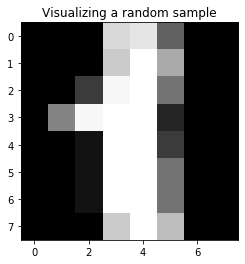

In [3]:
plt.imshow(np.reshape(X[1], [n,n]), cmap='Greys_r'); 
plt.title('Visualizing a random sample'); plt.show()

In [4]:
X, y = mnist
X = X/255
y = y

all_results = []
print(X.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=5)



(1797, 64) (1797,)


In [24]:
nbmodel = NaiveBayesClassifier(bandwidth=1,kernel='radial')
nbmodel.fit(x_train, y_train)
print("Performance of radial kernel with bandwidth '1' for Test set: %.4f"%nbmodel.score(x_test,y_test))

Performance of radial kernel with bandwidth '1' for Test set: 0.0796


In [25]:
nbmodel = NaiveBayesClassifier(bandwidth=1,kernel='hypercube')
nbmodel.fit(x_train, y_train)
print("Performance of hypercube kernel with bandwidth '1' for Test set: %.4f"%nbmodel.score(x_test,y_test))

Performance of hypercube kernel with bandwidth '1' for Test set: 0.0796


Best Val Accuracy 0.9788 | Bandwidths: 0.0953
Performance of best hypercube model for Test set: 0.9630
CPU times: user 1.22 s, sys: 138 ms, total: 1.36 s
Wall time: 2.1 s


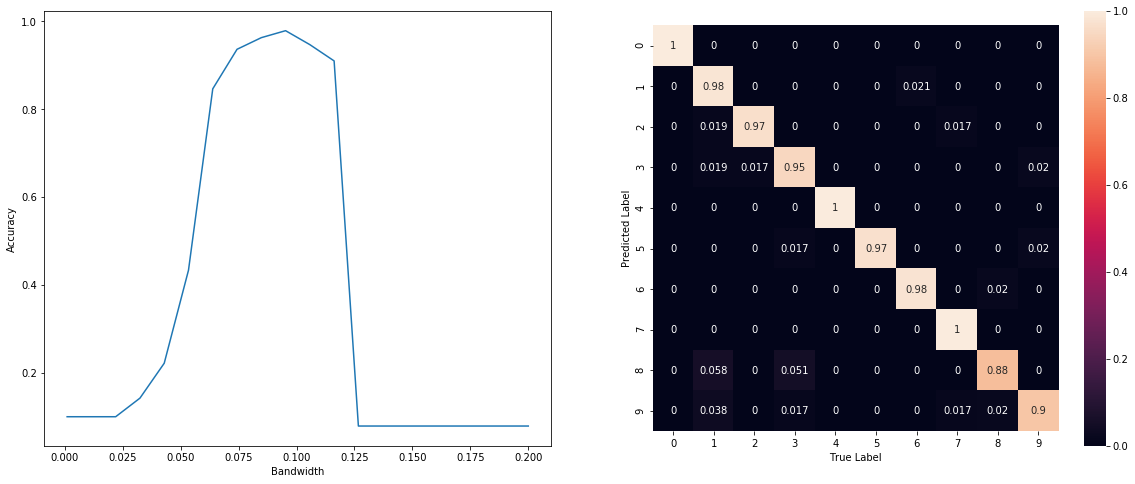

In [27]:
%%time
# bandwidths = [1e-1,1e-2,2e-2,3e-2,7e-2,9e-2,1e-3]   # values to be tunned
bandwidths = np.linspace(1e-3, 2e-1, 20)
kernels = ['hypercube'] # values to be tunned

results = grid_search(x_train, y_train, bandwidths, kernels, multi_bw=False)
best_params, best_results, best_model = results[np.argmax(results[:,1])]
rdf = pd.DataFrame({'bw':[sub[0] for sub in results[:,0]] ,'accr':results[:,1]})
rdf.sort_values(by=['bw'], inplace=True)
print("Best Val Accuracy %.4f | Bandwidths: %.4f"\
      %(best_results,best_params[0]))
# best_params, radial_results = grid_search(bandwidths, kernels)
print("Performance of best hypercube model for Test set: %.4f"%best_model.score(x_test,y_test))

all_results.append({'Classifier':'Radial','Bandwidth Type':'Single',\
                   'Bandwidth':best_params[0],'Accuracy score':best_model.score(x_test,y_test)})
confMat = confusion_matrix(y_test, best_model.pred_y)
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(rdf['bw'] , rdf['accr'])
ax[0].set(xlabel='Bandwidth',ylabel='Accuracy')
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax[1])
ax[1].set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

Best Val Accuracy 0.9947 | Bandwidths: 0.0218
Performance of best radial model for Test set: 0.9870
CPU times: user 1.09 s, sys: 153 ms, total: 1.24 s
Wall time: 1.91 s


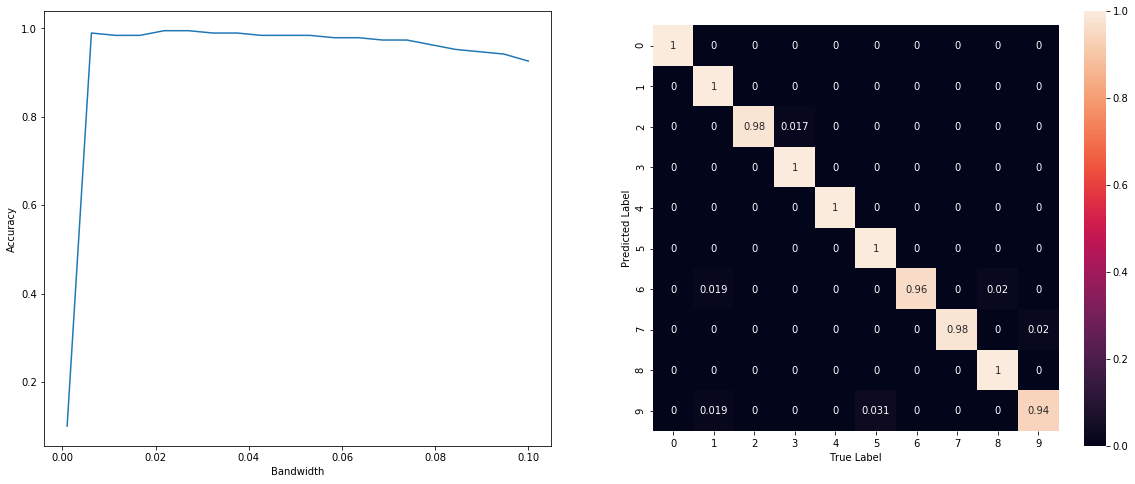

In [15]:
%%time
# bandwidths = [1,0.5,1e-1,1e-2,2e-2,3e-2,7e-2,9e-2,1e-3]   # values to be tunned
bandwidths = np.linspace(1e-3, 1e-1, 20)
kernels = ['radial'] # values to be tunned

results = grid_search(x_train, y_train, bandwidths, kernels, multi_bw=False)
best_params, best_results, best_model = results[np.argmax(results[:,1])]
rdf = pd.DataFrame({'bw':[sub[0] for sub in results[:,0]] ,'accr':results[:,1]})
rdf.sort_values(by=['bw'], inplace=True)
# plt.plot(rdf['bw'] , rdf['accr'])
print("Best Val Accuracy %.4f | Bandwidths: %.4f"\
      %(best_results,best_params[0]))
# best_params, radial_results = grid_search(bandwidths, kernels)
print("Performance of best radial model for Test set: %.4f"%best_model.score(x_test,y_test))

all_results.append({'Classifier':'Hypercube','Bandwidth Type':'Single',\
                   'Bandwidth':best_params[0],'Accuracy score':best_model.score(x_test,y_test)})

confMat = confusion_matrix(y_test, best_model.pred_y)
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(rdf['bw'] , rdf['accr'])
ax[0].set(xlabel='Bandwidth',ylabel='Accuracy')
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax[1])
ax[1].set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

In [16]:
gaussian_model = GaussianNB()
gaussian_model.fit(x_train,y_train)
print("Performance of default Gaussain NB for Test set: %.2f"%gaussian_model.score(x_test,y_test))

all_results.append({'Classifier':'Gaussian-default','Bandwidth Type':'N/A',\
                   'Bandwidth':gaussian_model.var_smoothing,'Accuracy score':gaussian_model.score(x_test,y_test)})

Performance of default Gaussain NB for Test set: 0.86


In [17]:
inter_results1 = inter_results = pd.DataFrame(all_results)
inter_results1.sort_values('Accuracy score',ascending=False,inplace=True)
inter_results1[['Classifier','Bandwidth Type','Bandwidth','Accuracy score']]

,Classifier,Bandwidth Type,Bandwidth,Accuracy score
1,Hypercube,Single,2.184211e-02,0.987037
0,Radial,Single,9.526316e-02,0.962963
2,Gaussian-default,N/A,1.000000e-09,0.855556


Performance of best Gaussain NB for Test set: 0.92
CPU times: user 608 ms, sys: 39.7 ms, total: 648 ms
Wall time: 667 ms


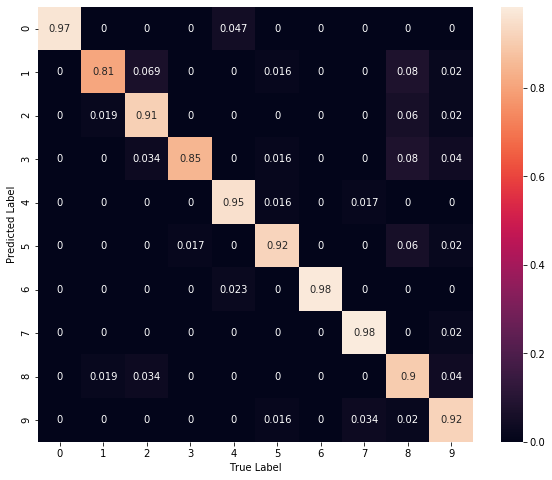

In [18]:
%%time
var_smoothing = [1,5e-1,1e-01,1e-02,1e-07,1e-08,1e-09]
gaussian_grid = GridSearchCV(GaussianNB(), {'var_smoothing': var_smoothing}, cv=5)
gaussian_grid.fit(x_train,y_train)
best_gaussain = gaussian_grid.best_estimator_
pred_y = best_gaussain.predict(x_test)
print("Performance of best Gaussain NB for Test set: %.2f"%best_gaussain.score(x_test,y_test))

all_results.append({'Classifier':'Gaussian','Bandwidth Type':'N/A',\
                   'Bandwidth':best_gaussain.var_smoothing,'Accuracy score':best_gaussain.score(x_test,y_test)})

confMat = confusion_matrix(y_test, pred_y)
fig,ax = plt.subplots(1,figsize=(10,8))
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax)
ax.set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

In [19]:
inter_results2 = pd.DataFrame(all_results)
inter_results2.sort_values('Accuracy score',ascending=False,inplace=True)
inter_results2[['Classifier','Bandwidth Type','Bandwidth','Accuracy score']]

,Classifier,Bandwidth Type,Bandwidth,Accuracy score
1,Hypercube,Single,2.184211e-02,0.987037
0,Radial,Single,9.526316e-02,0.962963
3,Gaussian,N/A,1.000000e-02,0.918519
2,Gaussian-default,N/A,1.000000e-09,0.855556


Best Val Accuracy 0.9788 | Bandwidths: [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
Performance of best hypercube model with Multi-class Bandwidths for Test set: 0.9630
CPU times: user 2.32 s, sys: 1.66 s, total: 3.98 s
Wall time: 26.2 s


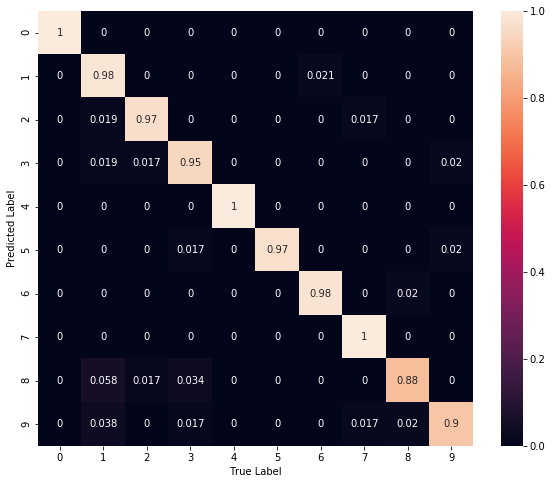

In [20]:
%%time
bw = [1e-1,3e-1]   # values to be tunned
kl = ['hypercube'] # values to be tunned
results = grid_search(x_train, y_train, bw, kl, multi_bw=True)
best_params, radial_results, best_model = results[np.argmax(results[:,1])]
print("Best Val Accuracy %.4f | Bandwidths: [%s]"\
      %(radial_results,', '.join('%.2f' % val for val in best_params[0])))
print("Performance of best hypercube model with Multi-class Bandwidths for Test set: %.4f"\
      %best_model.score(x_test,y_test))

all_results.append({'Classifier':'Hypercube','Bandwidth Type':'Multi',\
                   'Bandwidth':best_params[0],'Accuracy score':best_model.score(x_test,y_test)})

confMat = confusion_matrix(y_test, best_model.pred_y)
fig,ax = plt.subplots(1,figsize=(10,8))
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax)
ax.set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

Best Val Accuracy 0.9894 | Bandwidths: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
Performance of best radial model with Multi-class Bandwidths for Test set: 0.9889
CPU times: user 2.26 s, sys: 1.72 s, total: 3.99 s
Wall time: 29.4 s


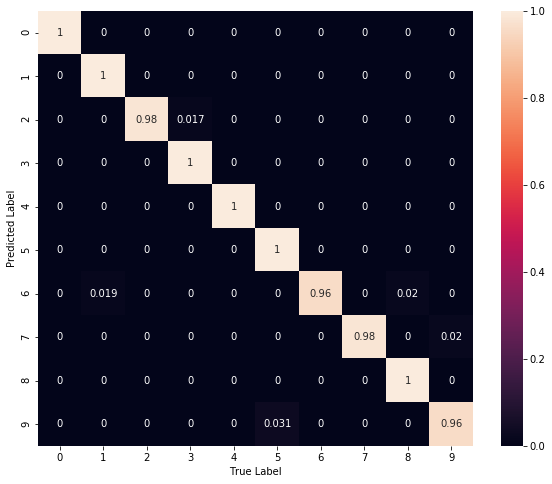

In [21]:
%%time
bw = [1e-2,3e-2]   # values to be tunned
kl = ['radial'] # values to be tunned
results = grid_search(x_train, y_train, bw, kl, multi_bw=True)
best_params, radial_results, best_model = results[np.argmax(results[:,1])]
print("Best Val Accuracy %.4f | Bandwidths: [%s]"\
      %(radial_results,', '.join('%.2f' % val for val in best_params[0])))
print("Performance of best radial model with Multi-class Bandwidths for Test set: %.4f"\
      %best_model.score(x_test,y_test))

all_results.append({'Classifier':'Radial','Bandwidth Type':'Multi',\
                   'Bandwidth':best_params[0],'Accuracy score':best_model.score(x_test,y_test)})

confMat = confusion_matrix(y_test, best_model.pred_y)
fig,ax = plt.subplots(1,figsize=(10,8))
sns.heatmap(confMat/np.sum(confMat,axis=1), annot=True,  square=True, ax=ax)
ax.set(xlabel='True Label', ylabel='Predicted Label')
plt.show()

## Results of comparison

With the multiple options we implemented, we end up with 4 different versions of classifiers.

We performed hyper parameter tuning for all the 4 models and the best models on the holdout set
are selected to predict on the testing set and below is the accuracies for each of the models. 

In [22]:
final_results = pd.DataFrame(all_results)
final_results.sort_values('Accuracy score',ascending=False,inplace=True)
final_results[['Classifier','Bandwidth Type','Bandwidth','Accuracy score']]

,Classifier,Bandwidth Type,Bandwidth,Accuracy score
5,Radial,Multi,"(0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...",0.988889
1,Hypercube,Single,0.0218421,0.987037
0,Radial,Single,0.0952632,0.962963
4,Hypercube,Multi,"(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",0.962963
3,Gaussian,N/A,0.01,0.918519
2,Gaussian-default,N/A,1e-09,0.855556


Clearly we can see that our implemented Radial kernel with a class-specific multi bandwidth model, has far outperformed
the existing sklearn Gaussian Naive Bayes model. 

### The choice between Gaussian model and KDE model

* One of the deciding factor will be the size of the data. If the training data is tooo small or the feature space is 
very small, it is better to use Gaussian Naive Bayes where we estimate parameters using MLE because of the sparsity of 
the examples. This applies if we are only thinking about model accuracy.
* The size of the data definitely increases the time complexity of the classification, since using KDE makes Naive 
Bayes a lazy learner. So it is not ideal in real-world that we spend so much time trying to make the predition.
* So when the data size is huge and we need quicker predictions, it is definitely better to use Gaussian NB rather than 
NB with KDE.



